In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import json
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58935,580B6220-6CD9-487E-B62E-7469F6B35C48,20210119,136.415029,30352577.0,28.0,Lost,W,56.0,2.10,1250.0,NaN,1.670799e+09,20210501.0,865.00
58936,AB9BB7F5-F286-432A-A90A-4A1FD4133584,20210119,136.835123,30352577.0,28.0,Lost,W,56.0,6.90,1250.0,NaN,1.670799e+09,20210501.0,858.00
58937,1BF002A8-A91C-482C-A357-1EA49CFB1B4F,20210119,135.407514,30352577.0,28.0,Lost,W,56.0,4.00,1250.0,NaN,1.670799e+09,20210501.0,857.00
58938,E9689DC2-323D-4372-A576-C07AE91752DE,20210119,134.838117,30352577.0,28.0,Lost,W,56.0,3.45,1500.0,NaN,1.670799e+09,20210501.0,875.00


In [ ]:
data = df.copy(True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,58930,58931,58932,58933,58934,58935,58936,58937,58938,58939
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,17BA3753-5EA0-477E-8558-0F400FF4907E,96AC5A0E-3853-46C6-955B-E1FC44A5A23D,899ED420-A526-4007-8548-630F764807F3,108C71D3-2D1F-43FE-827D-9CC83A5CA7FA,5B346E5C-F402-41A0-B651-40809845EA80,580B6220-6CD9-487E-B62E-7469F6B35C48,AB9BB7F5-F286-432A-A90A-4A1FD4133584,1BF002A8-A91C-482C-A357-1EA49CFB1B4F,E9689DC2-323D-4372-A576-C07AE91752DE,32C2B716-E920-45C3-A711-8C0792619C5F
item_date,20210401,20210401,20210401,20210401,20210401,20210401,20210401,20210401,20210401,20210401,...,20210119,20210119,20210119,20210119,20210119,20210119,20210119,20210119,20210119,20210119
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,52.806977,53.230986,101.726683,53.780286,142.650437,136.415029,136.835123,135.407514,134.838117,139.192
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30198761.0,30164630.0,30164630.0,30406343.0,30352577.0,30352577.0,30352577.0,30352577.0,30352577.0,NaN
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,26.0,27.0,27.0,26.0,28.0,28.0,28.0,28.0,28.0,NaN
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Lost,Lost,Lost,Lost,Lost,NaN
item type,W,W,WI,S,W,W,W,W,S,W,...,W,S,S,S,W,W,W,W,W,NaN
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,10.0,15.0,15.0,10.0,56.0,56.0,56.0,56.0,56.0,NaN
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,1.0,0.6,0.8,1.5,2.5,2.1,6.9,4.0,3.45,NaN
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1500.0,1250.0,1250.0,1270.0,1250.0,1250.0,1250.0,1250.0,1500.0,NaN


In [ ]:
data.shape

(58940, 14)

In [ ]:
data.info

<bound method DataFrame.info of                                          id  item_date  quantity tons  \
0      EC06F063-9DF0-440C-8764-0B0C05A4F6AE   20210401      54.151139   
1      4E5F4B3D-DDDF-499D-AFDE-A3227EC49425   20210401     768.024839   
2      E140FF1B-2407-4C02-A0DD-780A093B1158   20210401     386.127949   
3      F8D507A0-9C62-4EFE-831E-33E1DA53BB50   20210401     202.411065   
4      4E1C4E78-152B-430A-8094-ADD889C9D0AD   20210401     785.526262   
...                                     ...        ...            ...   
58935  580B6220-6CD9-487E-B62E-7469F6B35C48   20210119     136.415029   
58936  AB9BB7F5-F286-432A-A90A-4A1FD4133584   20210119     136.835123   
58937  1BF002A8-A91C-482C-A357-1EA49CFB1B4F   20210119     135.407514   
58938  E9689DC2-323D-4372-A576-C07AE91752DE   20210119     134.838117   
58939  32C2B716-E920-45C3-A711-8C0792619C5F   20210119     139.192000   

         customer  country status item type  application  thickness   width  \
0      30156308.0     28.0    Won         W         10.0       2.00  1500.0   
1      30202938.0     25.0    Won         W         41.0       0.80  1210.0   
2      30153963.0     30.0    Won        WI         28.0       0.38   952.0   
3      30349574.0     32.0    Won         S         59.0       2.30  1317.0   
4      30211560.0     28.0    Won         W         10.0       4.00  2000.0   
...           ...      ...    ...       ...          ...        ...     ...   
58935  30352577.0     28.0   Lost         W         56.0       2.10  1250.0   
58936  30352577.0     28.0   Lost         W         56.0       6.90  1250.0   
58937  30352577.0     28.0   Lost         W         56.0       4.00  1250.0   
58938  30352577.0     28.0   Lost         W         56.0       3.45  1500.0   
58939         NaN      NaN    NaN       NaN          NaN        NaN     NaN   

                                   material_ref   product_ref  delivery date  \
0                                   DEQ1 S460MC  1.670799e+09     20210701.0   
1      0000000000000000000000000000000000104991  1.668702e+09     20210401.0   
2                                      S0380700  6.283770e+05     20210101.0   
3                       DX51D+ZM310MAO 2.3X1317  1.668702e+09     20210101.0   
4                               2_S275JR+AR-CL1  6.406650e+05     20210301.0   
...                                         ...           ...            ...   
58935                                       NaN  1.670799e+09     20210501.0   
58936                                       NaN  1.670799e+09     20210501.0   
58937                                       NaN  1.670799e+09     20210501.0   
58938                                       NaN  1.670799e+09     20210501.0   
58939                                       NaN           NaN            NaN   

       selling_price  
0             854.00  
1            1047.00  
2             644.33  
3             768.00  
4             577.00  
...              ...  
58935         865.00  
58936         858.00  
58937         857.00  
58938         875.00  
58939            NaN  

[58940 rows x 14 columns]>

In [ ]:
data.isna().sum()

id                   1
item_date            0
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     25899
product_ref          1
delivery date        1
selling_price        1
dtype: int64

In [ ]:
for i in list(data.columns):
    print(f"{i}  \t:_____________{data[i].nunique()}")

id  	:_____________58939
item_date  	:_____________70
quantity tons  	:_____________58940
customer  	:_____________938
country  	:_____________17
status  	:_____________9
item type  	:_____________7
application  	:_____________30
thickness  	:_____________470
width  	:_____________1134
material_ref  	:_____________10466
product_ref  	:_____________29
delivery date  	:_____________22
selling_price  	:_____________3739


In [ ]:
data[data["id"].isna()==True]["id"]

26    NaN
Name: id, dtype: object

In [ ]:
data.iloc[26]

id                          NaN
item_date              20210401
quantity tons          15.92799
customer             30271717.0
country                    28.0
status           To be approved
item type                     W
application                10.0
thickness                   0.8
width                    1000.0
material_ref                NaN
product_ref            611993.0
delivery date        20210701.0
selling_price            1208.0
Name: 26, dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,58940.0,2.021025e+07,1.074635e+03,1.995000e+07,2.021020e+07,2.021030e+07,2.021032e+07,2.021040e+07
quantity tons,58940.0,9.663334e+01,3.908683e+02,1.867763e-03,1.057045e+01,3.078013e+01,6.799299e+01,2.030029e+04
customer,58939.0,3.023388e+07,1.437577e+05,1.245800e+04,3.019687e+07,3.020531e+07,3.028431e+07,3.040818e+07
country,58939.0,4.439449e+01,2.429171e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,58939.0,2.524924e+01,1.753264e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,58939.0,2.568180e+00,1.076419e+01,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,58939.0,1.302137e+03,2.523890e+02,1.000000e+00,1.190000e+03,1.250000e+03,1.500000e+03,2.300000e+03
product_ref,58939.0,5.123112e+08,7.384252e+08,6.117280e+05,6.281170e+05,6.406650e+05,1.668702e+09,1.722208e+09
delivery date,58939.0,2.021072e+07,4.160283e+04,2.019040e+07,2.021040e+07,2.021060e+07,2.021070e+07,3.031010e+07
selling_price,58939.0,4.354421e+03,5.825189e+05,-1.160000e+03,8.600000e+02,9.550000e+02,1.075000e+03,1.000010e+08


preproceessing
Converting Date Time format

In [ ]:
columns_convertdatetime=["item_date","delivery date"]
for i in columns_convertdatetime:
  data[i]=pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.0


In [ ]:
data.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref      float64
delivery date     object
selling_price    float64
dtype: object

In [ ]:
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y-%m-%d')
data['delivery date']=pd.to_datetime(data['delivery date'],format='%Y-%m-%d')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.0


In [ ]:
print(data['item_date'].max())
print(data['item_date'].min())

2021-04-01 00:00:00
2021-01-19 00:00:00


In [ ]:
print(data["delivery date"].max())
print(data['delivery date'].min())

2022-01-01 00:00:00
2019-04-01 00:00:00


In [ ]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref             float64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

CONVERTING NUMERIC VALUES

In [ ]:
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  data[i]=pd.to_numeric(data[i],errors='coerce')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.0


In [ ]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref             float64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [ ]:
data.isna().sum()

id                   1
item_date            1
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     25899
product_ref          1
delivery date        2
selling_price        1
dtype: int64

In [ ]:
data.drop(columns=['id'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.0


In [ ]:
data['material_ref'] = data['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1.668702e+09,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33


In [ ]:
data.drop(columns=['material_ref'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1.670799e+09,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1.668702e+09,2021-04-01,1047.0


In [ ]:
data.isna().sum()

item_date        1
quantity tons    0
customer         1
country          1
status           1
item type        1
application      1
thickness        1
width            1
product_ref      1
delivery date    2
selling_price    1
dtype: int64

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,58939,2021-02-24 21:53:27.987919872,2021-01-19 00:00:00,2021-02-04 00:00:00,2021-03-01 00:00:00,2021-03-16 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,58940.0,96.633344,0.001868,10.570448,30.780126,67.992986,20300.29359,390.868292
customer,58939.0,30233882.114525,12458.0,30196870.0,30205312.0,30284310.0,30408185.0,143757.667717
country,58939.0,44.394493,25.0,26.0,30.0,78.0,113.0,24.291707
application,58939.0,25.249241,2.0,10.0,15.0,41.0,99.0,17.53264
thickness,58939.0,2.56818,0.18,0.7,1.5,3.0,2500.0,10.764188
width,58939.0,1302.136819,1.0,1190.0,1250.0,1500.0,2300.0,252.389042
product_ref,58939.0,512311228.917966,611728.0,628117.0,640665.0,1668701718.0,1722207579.0,738425219.002197
delivery date,58938,2021-05-19 05:15:35.640843264,2019-04-01 00:00:00,2021-04-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,58939.0,4354.420745,-1160.0,860.0,955.0,1075.0,100001015.0,582518.923843


change the negative values

In [ ]:
# data['quantity tons'] = data['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
# data['selling_price'] = data['selling_price'].apply(lambda x: np.nan if x<=0 else x)
# data.describe().T

FILLNA VALUES

with mean

In [ ]:
# columns_fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
# column_means = data[columns_fill_mean].mean()
# data[columns_fill_mean] = data[columns_fill_mean].fillna(column_means)

WITH MEDIEN

In [ ]:
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

WITH MODE

In [ ]:
# columns_fill_mode = ['item_date', 'status', 'delivery date']
# columns_modes = data[columns_fill_mode].mode().iloc[0]
# data[columns_fill_mode] = data[columns_fill_mode].fillna(columns_modes)

In [ ]:
# object datatype using mode
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)
data['item type'].fillna(data['item type'].mode().iloc[0], inplace=True)
data['width'].fillna(data['width'].mode().iloc[0], inplace=True)
data['product_ref'].fillna(data['product_ref'].mode().iloc[0], inplace=True)

In [ ]:
data["country"]=data["country"].astype('int64')

In [ ]:
data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref             float64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [ ]:
data.to_csv('clean_copper_data.csv',index=False)

EDA

In [ ]:
eda_data=data.copy(True)

In [ ]:
eda_data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref             float64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

Using Boxplot and Distplot

<ipython-input-44-da373f84faef>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
<ipython-input-44-da373f84faef>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
<ipython-input-44-da373f84faef>:15: UserWarning: 


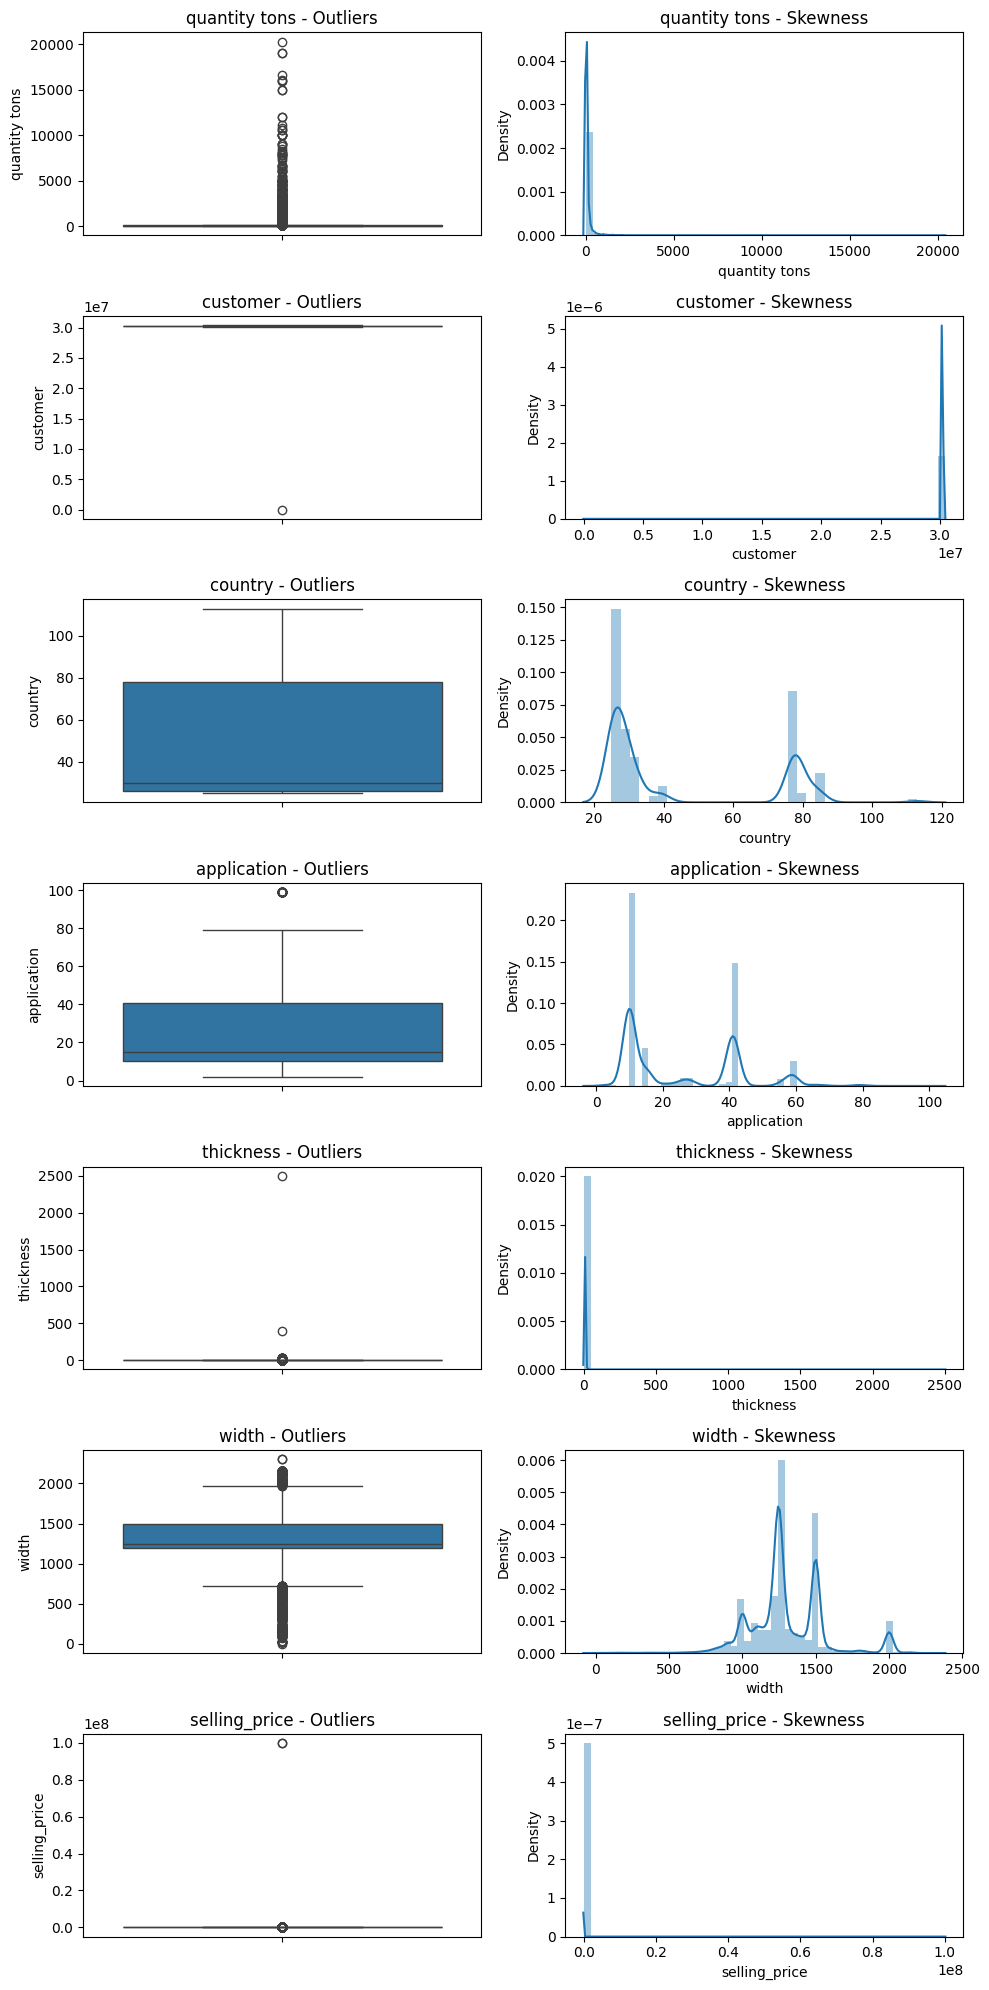

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10,20))

sns.boxplot(ax=axes[0, 0], data=eda_data['quantity tons'])      #quantity tons
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')

sns.boxplot(ax=axes[1, 0], data=eda_data['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=eda_data['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=eda_data['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=eda_data['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=eda_data['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=eda_data['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=eda_data['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=eda_data['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=eda_data['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=eda_data['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=eda_data['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()

USING VIOLIN PLOT

In [ ]:
def plot(eda_data, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=eda_data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

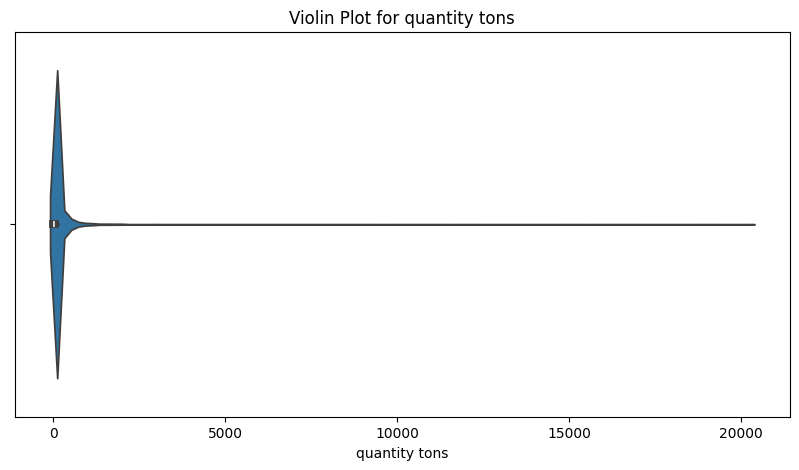

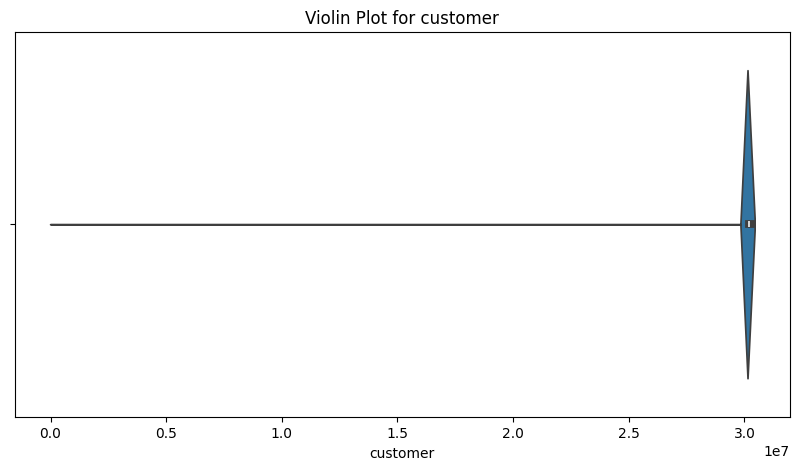

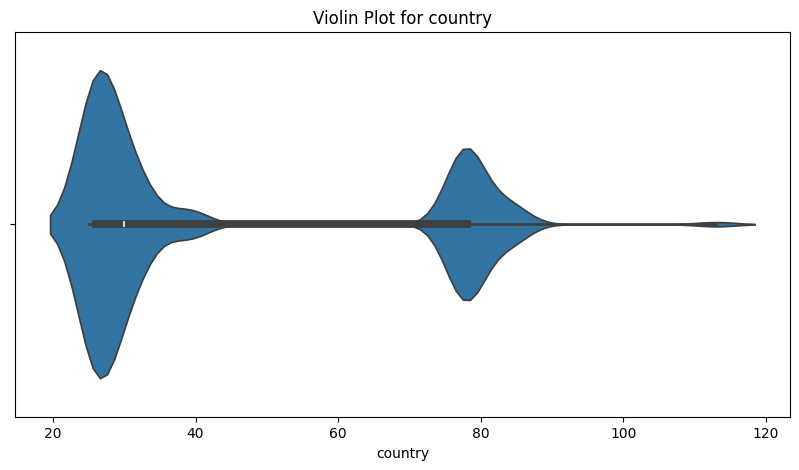

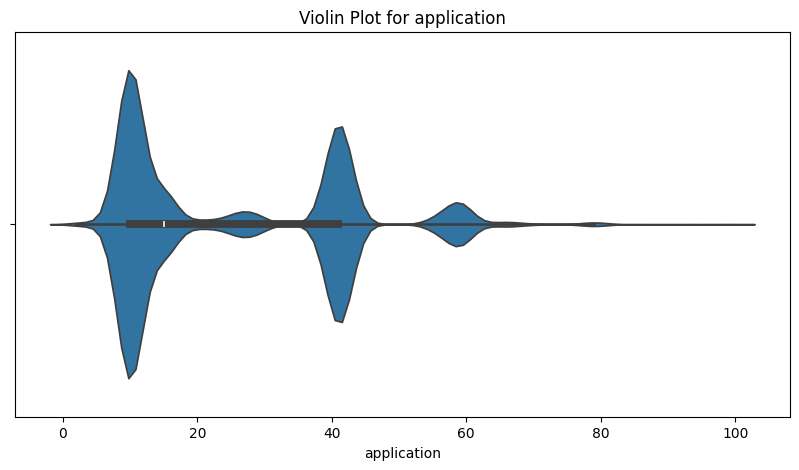

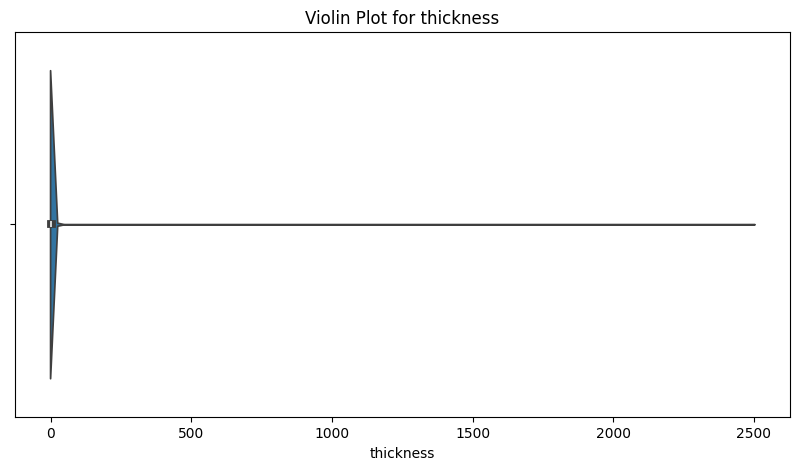

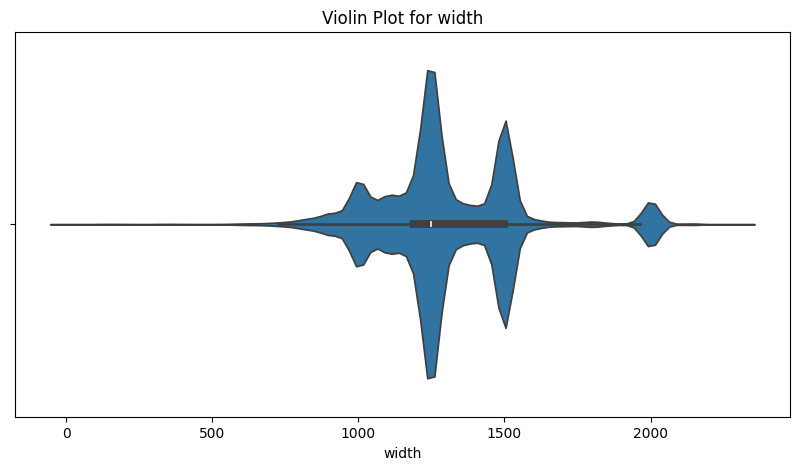

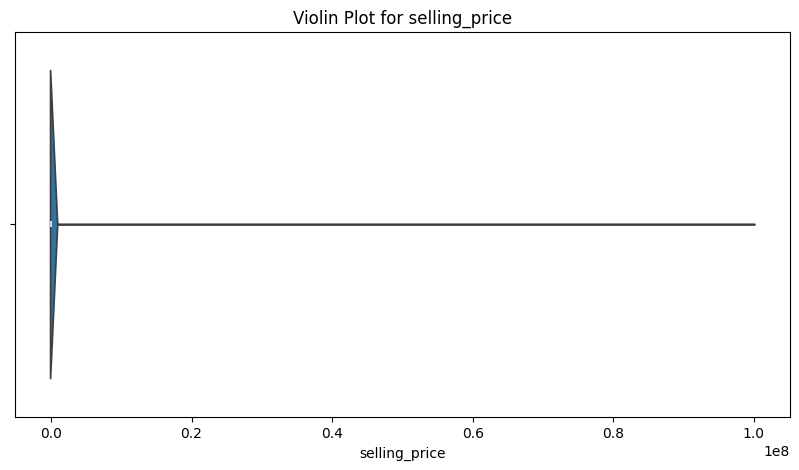

In [ ]:
for i in ['quantity tons', 'customer', 'country',  'application', 'thickness', 'width', 'selling_price']:
    plot(eda_data, i)

In [ ]:
out_skew_data=eda_data.copy(True)

In [ ]:
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

quantity tons : 0 
thickness : 0 
width : 0 
selling_price : 6 


In [ ]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    6
dtype: int64

In [ ]:
out_skew_data.dropna(inplace=True)

In [ ]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
out_skew_data_1=out_skew_data.copy(True)

In [ ]:
out_skew_data_1=out_skew_data_1.drop(['item_date','delivery date','status','item type'],axis=1)
# out_skew_data_2=out_skew_data_1.copy(True)

In [ ]:
out_skew_data_1.skew()

quantity tons     22.247517
customer        -157.532059
country            0.832084
application        0.698155
thickness         35.055809
width              0.571014
product_ref        0.877365
selling_price    171.655138
dtype: float64

In [ ]:
print(out_skew_data['item_date'].max())
print(out_skew_data['item_date'].min())
print(out_skew_data["delivery date"].max())
print(out_skew_data['delivery date'].min())

2021-04-01 00:00:00
2021-01-19 00:00:00
2022-01-01 00:00:00
2019-04-01 00:00:00


IQR-Inter Quartile Range

In [ ]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = out_skew_data[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = out_skew_data[column].quantile(0.25)
    Q3 = out_skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_skew_data[column] = out_skew_data[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = out_skew_data[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       quantity tons     thickness         width  selling_price
count   58934.000000  58934.000000  58934.000000   58934.000000
mean       50.176463      2.249138   1301.793194     972.735119
std        49.305704      1.876821    241.437605     170.979640
min         0.001868      0.180000    725.000000     537.500000
25%        10.568756      0.700000   1190.000000     860.000000
50%        30.779514      1.500000   1250.000000     955.000000
75%        67.992826      3.000000   1500.000000    1075.000000
max       154.128932      6.450000   1965.000000    1397.500000

Summary statistics after removing outliers:
       quantity tons     thickness         width  selling_price
count   58934.000000  58934.000000  58934.000000   58934.000000
mean       50.176463      2.249138   1301.793194     972.735119
std        49.305704      1.876821    241.437605     170.979640
min         0.001868      0.180000    725.000000     537.500000
25%        10.

<function matplotlib.pyplot.show(close=None, block=None)>

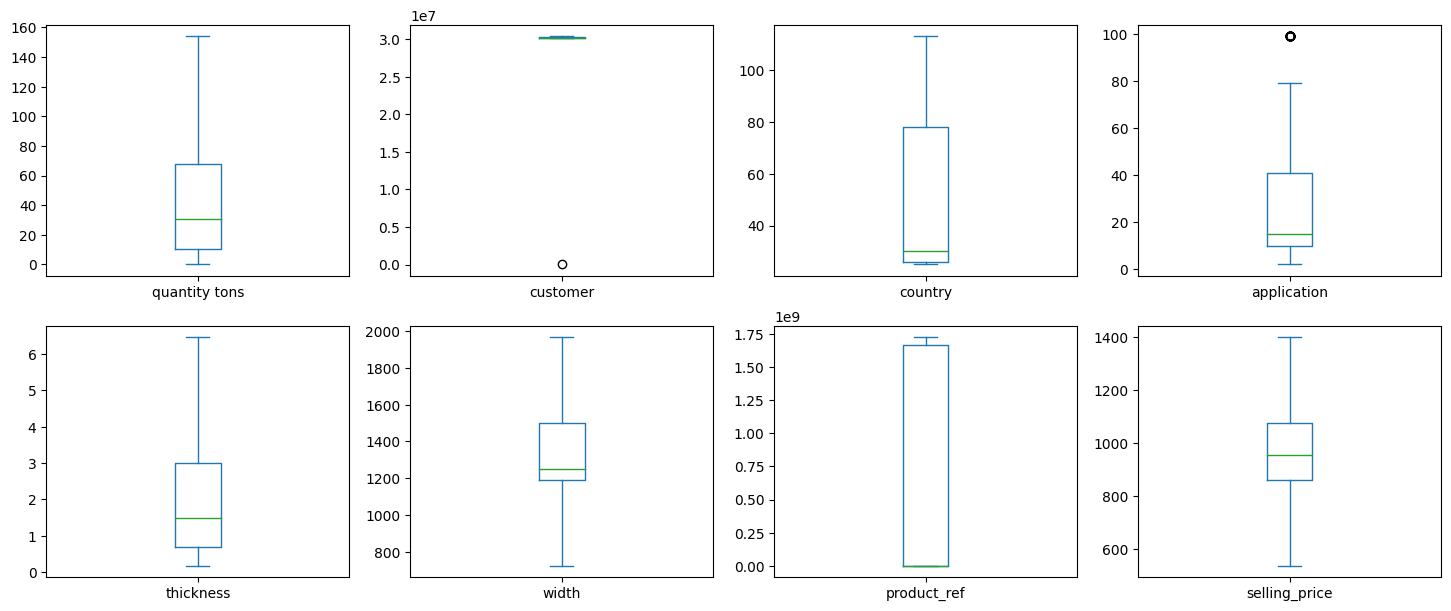

In [ ]:
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

<ipython-input-61-ebc2b584e0be>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
<ipython-input-61-ebc2b584e0be>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
<ipython-input-61-ebc2b584e0be>:7: UserWarni

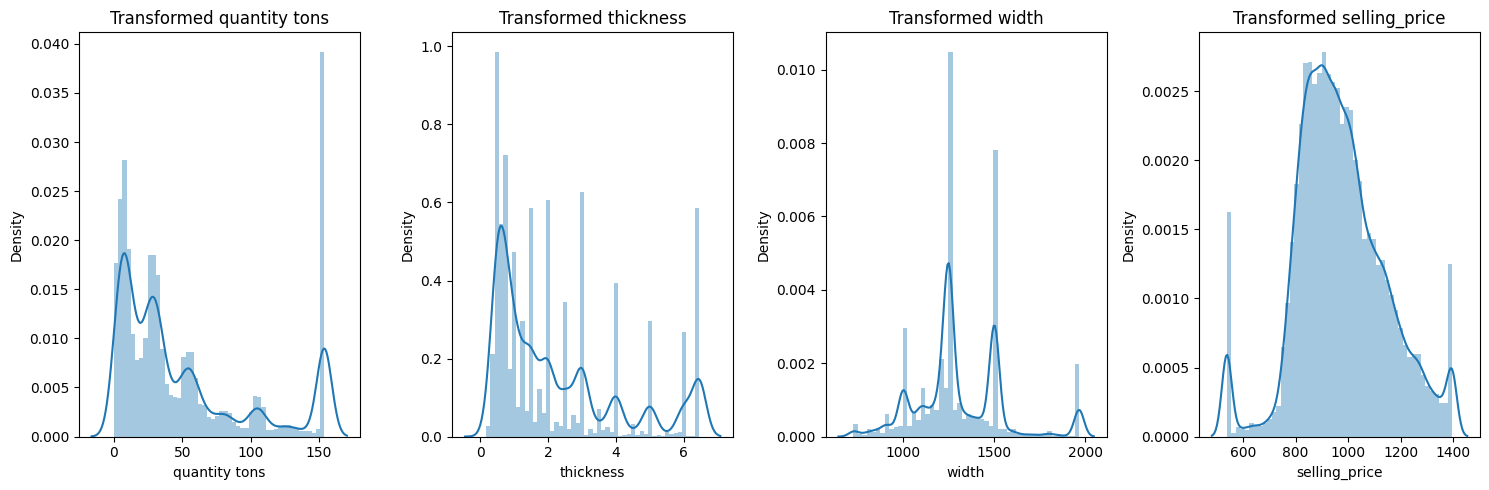

In [ ]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
out_skew_data_1.skew()

quantity tons     22.247517
customer        -157.532059
country            0.832084
application        0.698155
thickness         35.055809
width              0.571014
product_ref        0.877365
selling_price    171.655138
dtype: float64

In [ ]:
# Here are some guidelines for interpreting skewness values:

# Skewness value close to 0: The distribution is approximately symmetrical.
# Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.
# Skewness value less than -1 or greater than 1: The distribution is highly skewed.

FEATURE ENGINEERING

In [ ]:
model_data=out_skew_data.copy(True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58934 entries, 0 to 58939
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   item_date      58934 non-null  datetime64[ns]
 1   quantity tons  58934 non-null  float64       
 2   customer       58934 non-null  float64       
 3   country        58934 non-null  int64         
 4   status         58934 non-null  object        
 5   item type      58934 non-null  object        
 6   application    58934 non-null  float64       
 7   thickness      58934 non-null  float64       
 8   width          58934 non-null  float64       
 9   product_ref    58934 non-null  float64       
 10  delivery date  58934 non-null  datetime64[ns]
 11  selling_price  58934 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 5.8+ MB


In [ ]:
model_data['delivery_time_taken']=(model_data['item_date']-model_data['delivery date']).abs().dt.days
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1.670799e+09,2021-07-01,854.00,91
1,2021-04-01,154.128932,30202938.0,25,Won,W,41.0,0.80,1210.0,1.668702e+09,2021-04-01,1047.00,0
2,2021-04-01,154.128932,30153963.0,30,Won,WI,28.0,0.38,952.0,6.283770e+05,2021-01-01,644.33,90
3,2021-04-01,154.128932,30349574.0,32,Won,S,59.0,2.30,1317.0,1.668702e+09,2021-01-01,768.00,90
4,2021-04-01,154.128932,30211560.0,28,Won,W,10.0,4.00,1965.0,6.406650e+05,2021-03-01,577.00,31


In [ ]:
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']]

In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58934 entries, 0 to 58939
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   item_date            58934 non-null  datetime64[ns]
 1   quantity tons        58934 non-null  float64       
 2   customer             58934 non-null  float64       
 3   country              58934 non-null  int64         
 4   status               58934 non-null  object        
 5   item type            58934 non-null  object        
 6   application          58934 non-null  float64       
 7   thickness            58934 non-null  float64       
 8   width                58934 non-null  float64       
 9   product_ref          58934 non-null  float64       
 10  delivery date        58934 non-null  datetime64[ns]
 11  selling_price        58934 non-null  float64       
 12  delivery_time_taken  58934 non-null  int64         
dtypes: datetime64[ns](2), float64(7), in

In [ ]:
num=model_data.select_dtypes(include=np.number)
num

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28,10.0,2.00,1500.0,1.670799e+09,854.00,91
1,154.128932,30202938.0,25,41.0,0.80,1210.0,1.668702e+09,1047.00,0
2,154.128932,30153963.0,30,28.0,0.38,952.0,6.283770e+05,644.33,90
3,154.128932,30349574.0,32,59.0,2.30,1317.0,1.668702e+09,768.00,90
4,154.128932,30211560.0,28,10.0,4.00,1965.0,6.406650e+05,577.00,31
...,...,...,...,...,...,...,...,...,...
58935,136.415029,30352577.0,28,56.0,2.10,1250.0,1.670799e+09,865.00,102
58936,136.835123,30352577.0,28,56.0,6.45,1250.0,1.670799e+09,858.00,102
58937,135.407514,30352577.0,28,56.0,4.00,1250.0,1.670799e+09,857.00,102
58938,134.838117,30352577.0,28,56.0,3.45,1500.0,1.670799e+09,875.00,102


Correlation

In [ ]:
# correlation matrix (ranges from 1 to -1)
corrm=num.corr()
#corrm.to_csv('corrm.csv')
corrm

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
quantity tons,1.000000,0.033992,-0.081010,0.122201,0.026714,0.010473,0.077534,-0.031474,0.036002
customer,0.033992,1.000000,0.073657,-0.001899,0.088662,0.050710,-0.015738,0.012435,0.020060
country,-0.081010,0.073657,1.000000,0.000542,-0.053556,0.043132,-0.174931,-0.004889,-0.280929
application,0.122201,-0.001899,0.000542,1.000000,-0.173208,-0.200878,-0.138576,0.164560,-0.172414
thickness,0.026714,0.088662,-0.053556,-0.173208,1.000000,0.433841,0.129911,-0.450973,0.035132
width,0.010473,0.050710,0.043132,-0.200878,0.433841,1.000000,-0.021330,-0.236393,-0.008195
product_ref,0.077534,-0.015738,-0.174931,-0.138576,0.129911,-0.021330,1.000000,-0.117515,0.199313
selling_price,-0.031474,0.012435,-0.004889,0.164560,-0.450973,-0.236393,-0.117515,1.000000,0.106006
delivery_time_taken,0.036002,0.020060,-0.280929,-0.172414,0.035132,-0.008195,0.199313,0.106006,1.000000


Heatmap

<Axes: >

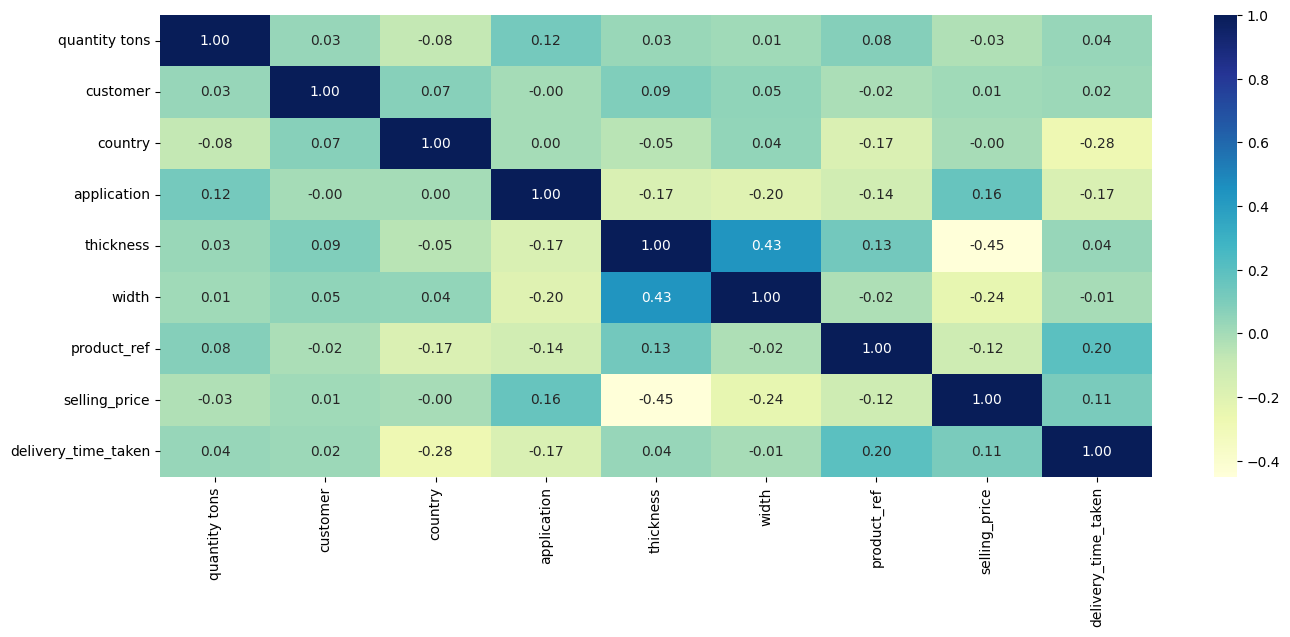

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="YlGnBu",fmt=".2f")

FINDING UNIQUE VALUE

In [ ]:
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
print(country)
print(status)
print(item)

['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '107' '89']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


ENCODE THE CATEGORICAL COLUMN
country

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encode=OrdinalEncoder()
model_data["country"] = encode.fit_transform(model_data[["country"]])
transformed_country=model_data["country"].unique()

transformed_country

array([ 5.,  2.,  6.,  7.,  8., 12.,  4., 11.,  1., 13.,  3.,  9., 10.,
       15., 14.,  0., 16.])


status

In [ ]:
encode=OrdinalEncoder()
model_data['status'] = encode.fit_transform(model_data[['status']])
transformed_status=model_data['status'].unique()

transformed_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

item type

In [ ]:
encode=OrdinalEncoder()
model_data["item type"] = encode.fit_transform(model_data[["item type"]])
transformed_item=model_data["item type"].unique()

transformed_item

array([5., 6., 3., 1., 2., 0., 4.])

In [ ]:
model_data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1.670799e+09,2021-07-01,854.00,91
1,2021-04-01,154.128932,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1.668702e+09,2021-04-01,1047.00,0
2,2021-04-01,154.128932,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,6.283770e+05,2021-01-01,644.33,90


In [ ]:
co=model_data.corr()
co

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
item_date,1.000000,0.015694,0.034369,-0.059489,0.129535,0.020289,0.033197,0.064981,0.012959,0.035465,0.462468,0.136627,0.052450
quantity tons,0.015694,1.000000,0.033992,-0.081821,-0.041770,-0.210745,0.122201,0.026714,0.010473,0.077534,0.023165,-0.031474,0.036002
customer,0.034369,0.033992,1.000000,0.071054,-0.022161,-0.064513,-0.001899,0.088662,0.050710,-0.015738,0.031818,0.012435,0.020060
country,-0.059489,-0.081821,0.071054,1.000000,0.048572,0.138139,-0.043210,-0.016857,0.050238,-0.157650,-0.219859,-0.046309,-0.252161
status,0.129535,-0.041770,-0.022161,0.048572,1.000000,0.214907,0.101728,-0.087232,-0.051958,-0.052069,-0.137393,0.122994,-0.225578
item type,0.020289,-0.210745,-0.064513,0.138139,0.214907,1.000000,0.161541,-0.092698,-0.101386,-0.083360,-0.063775,0.067536,-0.102458
application,0.033197,0.122201,-0.001899,-0.043210,0.101728,0.161541,1.000000,-0.173208,-0.200878,-0.138576,-0.135239,0.164560,-0.172414
thickness,0.064981,0.026714,0.088662,-0.016857,-0.087232,-0.092698,-0.173208,1.000000,0.433841,0.129911,0.064038,-0.450973,0.035132
width,0.012959,0.010473,0.050710,0.050238,-0.051958,-0.101386,-0.200878,0.433841,1.000000,-0.021330,0.007951,-0.236393,-0.008195
product_ref,0.035465,0.077534,-0.015738,-0.157650,-0.052069,-0.083360,-0.138576,0.129911,-0.021330,1.000000,0.175121,-0.117515,0.199313



After encoding the Categorical data

In [ ]:
for i, j in zip(status, transformed_status):
    print('After encoding :',i,'----- encoded :',j)

After encoding : Won ----- encoded : 7.0
After encoding : Draft ----- encoded : 0.0
After encoding : To be approved ----- encoded : 6.0
After encoding : Lost ----- encoded : 1.0
After encoding : Not lost for AM ----- encoded : 2.0
After encoding : Wonderful ----- encoded : 8.0
After encoding : Revised ----- encoded : 5.0
After encoding : Offered ----- encoded : 4.0
After encoding : Offerable ----- encoded : 3.0


In [ ]:
for i,j in zip(item, transformed_item):
    print('After encoding :',i,'----- encoded :',j)

After encoding : W ----- encoded : 5.0
After encoding : WI ----- encoded : 6.0
After encoding : S ----- encoded : 3.0
After encoding : Others ----- encoded : 1.0
After encoding : PL ----- encoded : 2.0
After encoding : IPL ----- encoded : 0.0
After encoding : SLAWR ----- encoded : 4.0


In [ ]:
for i,j in zip(country, transformed_country):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 28 ----- encoded : 5.0
After encoding : 25 ----- encoded : 2.0
After encoding : 30 ----- encoded : 6.0
After encoding : 32 ----- encoded : 7.0
After encoding : 38 ----- encoded : 8.0
After encoding : 78 ----- encoded : 12.0
After encoding : 27 ----- encoded : 4.0
After encoding : 77 ----- encoded : 11.0
After encoding : 113 ----- encoded : 1.0
After encoding : 79 ----- encoded : 13.0
After encoding : 26 ----- encoded : 3.0
After encoding : 39 ----- encoded : 9.0
After encoding : 40 ----- encoded : 10.0
After encoding : 84 ----- encoded : 15.0
After encoding : 80 ----- encoded : 14.0
After encoding : 107 ----- encoded : 0.0
After encoding : 89 ----- encoded : 16.0


PICKLE

In [ ]:
import pickle

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(transformed_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(transformed_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(transformed_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


LOAD

In [ ]:
import pickle
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

REGRESSION MODEL FOR FINDING SELLING PRICE

In [ ]:
category_col=['status', 'item type','country']
encoder= OrdinalEncoder()
for i in category_col:
    print(i)
    model_data[i] = encoder.fit_transform(model_data[[i]])
    print(model_data[i].unique())

status
[7. 0. 6. 1. 2. 8. 5. 4. 3.]
item type
[5. 6. 3. 1. 2. 0. 4.]
country
[ 5.  2.  6.  7.  8. 12.  4. 11.  1. 13.  3.  9. 10. 15. 14.  0. 16.]


In [ ]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1.670799e+09,2021-07-01,854.00,91
1,2021-04-01,154.128932,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1.668702e+09,2021-04-01,1047.00,0
2,2021-04-01,154.128932,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,6.283770e+05,2021-01-01,644.33,90
3,2021-04-01,154.128932,30349574.0,7.0,7.0,3.0,59.0,2.30,1317.0,1.668702e+09,2021-01-01,768.00,90
4,2021-04-01,154.128932,30211560.0,5.0,7.0,5.0,10.0,4.00,1965.0,6.406650e+05,2021-03-01,577.00,31


In [ ]:
X = model_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = model_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import pickle
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


In [ ]:
et_model = ExtraTreesRegressor()                   # Extra Tree Regressor
xgb_model = XGBRegressor()                         # Extreme Gradient Boost Regressor
dt_model = DecisionTreeRegressor()                 # Decision Tree Regressor

# Train the models
et_model.fit(X_train, y_train)
xgb_model.fit(X_train,y_train)
dt_model.fit(X_train, y_train)


# Make predictions on the test set
et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate the models

et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

In [ ]:
print(f"ExtraTreeRegressor    MSE: {et_mse},  MAE: {et_mae},  R2: {et_r2}")
print(f"XGBRegressor          MSE: {xgb_mse},  MAE: {xgb_mae},  R2: {xgb_r2}")
print(f"DecisionTreeRegressor MSE: {dt_mse},  MAE: {dt_mae}, R2: {dt_r2}")

ExtraTreeRegressor    MSE: 2400.605143809496,  MAE: 29.319147989776134,  R2: 0.9179328437296608
XGBRegressor          MSE: 2804.533469713907,  MAE: 35.93390540611932,  R2: 0.904124138399883
DecisionTreeRegressor MSE: 3895.289075035207,  MAE: 33.92024482084584, R2: 0.8668355360049882


In [ ]:
models = ['ExtraTreeRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [et_r2, dt_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreeRegressor 0.9179328437296608
DecisionTreeRegressor 0.8668355360049882
XGBRegressor 0.904124138399883

Model: ExtraTreeRegressor contain Maximum R2_Score: 0.9179328437296608 


In [ ]:
model=et_model.fit(X_train, y_train)

In [ ]:
import pickle

file_path7='ExtraTreeRegressor.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: ExtraTreeRegressor.pkl


In [ ]:
with open('ExtraTreeRegressor.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

ExtraTreesRegressor()

In [ ]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_st = input("Enter a status: ")
s = None
for i, j in zip(status, transformed_status):
    if new_sample_st == i:
        s = j
        break
else:
    print("Status not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()

try:
  x = [quantity,thickness,width,c, s, it, 41.0,611993, 28]
  x = np.array(x).reshape(1, -1)  # Reshape to 2D array
  new_sample_scaled = scaler.transform(x)
  new_pred = et_model.predict(new_sample_scaled)
  print('Predicted selling price:',new_pred )
except:
  print('enter correct values')

Enter quantity :750.7658
Enter thickness :56
Enter width :76
Enter a country: india
Country not found.
Enter a status: good
Status not found.
Enter an item type: nothing
Item type not found.
enter correct values


CLASSIFICATION MODEL FOR PREDICT THE STATUS WON/LOST